<a href="https://colab.research.google.com/github/mahitha09/Creditcard-fraud-detection/blob/main/Creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Credit card fraud detection

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [61]:
data = pd.read_csv('/content/creditcard.csv')

In [62]:
#First Five rows
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [63]:
#Last Five rows
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
188256,127893.0,-8.852104,-11.509369,0.449332,2.068166,5.423514,-4.506990,-3.722182,-0.343961,-1.255238,2.642756,-0.280297,-0.790324,1.510355,-0.902942,2.020117,-1.131299,1.233969,0.313896,3.486534,-3.397654,-1.390078,1.059268,5.788621,1.226642,1.186211,0.584517,1.783203,-0.400900,37.5,0.0
188257,127894.0,1.609287,-0.581437,0.008484,1.655629,-1.162795,-0.938786,-0.287847,-0.124818,0.855258,0.154009,-0.117613,0.466487,-0.200015,0.130179,0.796716,0.170865,-0.396817,0.019199,-1.212062,-0.004416,0.373621,0.902301,0.129504,0.858324,-0.281039,-0.628079,0.032977,0.003303,150.0,0.0
188258,127894.0,2.097886,-0.685229,-1.281921,-0.318993,-0.235987,-0.167462,-0.382762,-0.114099,-0.412410,0.799106,0.551305,1.314165,0.854456,0.001662,-1.387464,-2.153022,-0.049323,1.331207,-0.385525,-0.575829,-0.136930,0.381340,0.056371,0.740105,0.272978,-0.107836,0.016936,-0.057214,11.5,0.0
188259,127894.0,1.851731,-0.368532,0.157316,1.422273,-0.917616,-0.315417,-0.696940,0.053708,1.206733,0.136071,-1.020010,0.266223,-0.052756,-0.172452,0.665256,0.576153,-0.753759,0.288320,-0.683396,-0.182517,0.073982,0.288365,0.247731,-0.001908,-0.361825,-0.760861,0.069835,-0.013513,45.0,0.0
188260,127894.0,1.759307,-0.459599,-0.379355,1.665059,-0.555768,-0.275380,-0.174480,0.001335,1.259834,-0.039248,-1.359496,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188261 entries, 0 to 188260
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    188261 non-null  float64
 1   V1      188261 non-null  float64
 2   V2      188261 non-null  float64
 3   V3      188261 non-null  float64
 4   V4      188261 non-null  float64
 5   V5      188261 non-null  float64
 6   V6      188261 non-null  float64
 7   V7      188261 non-null  float64
 8   V8      188261 non-null  float64
 9   V9      188261 non-null  float64
 10  V10     188261 non-null  float64
 11  V11     188261 non-null  float64
 12  V12     188261 non-null  float64
 13  V13     188260 non-null  float64
 14  V14     188260 non-null  float64
 15  V15     188260 non-null  float64
 16  V16     188260 non-null  float64
 17  V17     188260 non-null  float64
 18  V18     188260 non-null  float64
 19  V19     188260 non-null  float64
 20  V20     188260 non-null  float64
 21  V21     18

Data Analysis

In [66]:
# Get the Fraud and the normal dataset 

fraud_data = data[data['Class']==1]

normal_data = data[data['Class']==0]

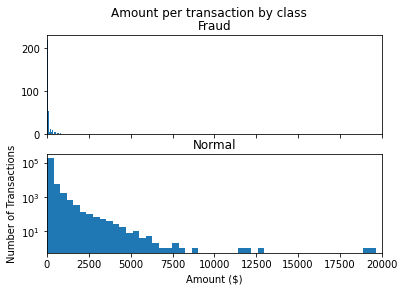

In [67]:
#Amount per transaction by class

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud_data.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal_data.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

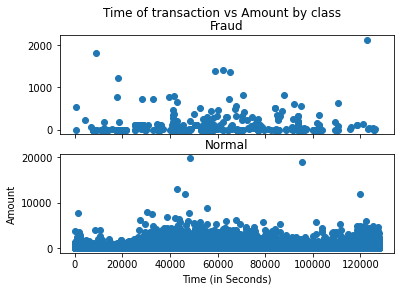

In [68]:
#Time of transaction vs Amount by class

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud_data.Time, fraud_data.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal_data.Time, normal_data.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [70]:

print(fraud_data.shape,normal_data.shape)


(368, 31) (187892, 31)


In [71]:
fraud_data.Amount.describe()

count     368.000000
mean      115.659891
std       248.444604
min         0.000000
25%         1.000000
50%        11.395000
75%       104.007500
max      2125.870000
Name: Amount, dtype: float64

In [72]:
normal_data.Amount.describe()


count    187892.000000
mean         88.949661
std         247.532742
min           0.000000
25%           5.960000
50%          22.750000
75%          79.000000
max       19656.530000
Name: Amount, dtype: float64

Train and test data

In [73]:
# Take some sample of the data
data_sample= data.sample(frac = 0.1,random_state=1)
data_sample.shape

(18826, 31)

In [74]:
data.shape

(188261, 31)

In [77]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data_sample[data_sample['Class']==1]
Valid = data_sample[data_sample['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.0017026710652335852
Fraud Cases : 32
Valid Cases : 18794


ML MODEL

In [79]:
#Create independent and Dependent Features
columns = data_sample.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data_sample[columns]
Y = data_sample[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(18826, 30)
(18826,)


In [80]:
#Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)
}

In [81]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 45
Accuracy Score :
0.9976096887283544
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18794
         1.0       0.30      0.31      0.31        32

    accuracy                           1.00     18826
   macro avg       0.65      0.66      0.65     18826
weighted avg       1.00      1.00      1.00     18826

Local Outlier Factor: 63
Accuracy Score :
0.9966535642196962
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18794
         1.0       0.03      0.03      0.03        32

    accuracy                           1.00     18826
   macro avg       0.51      0.51      0.51     18826
weighted avg       1.00      1.00      1.00     18826

